    *为获得最佳查看体验，请尽量选择html版本

#  单元的有限元计算

## 摘要

        有限单元法是在当今技术科学发展和工程分析中获得最广泛应用的数值方法。由于它的通用性和有效性，受到工程技术界的高度重视。伴随着计算机科学和技术的快速发展，现已成为计算机辅助工程和数值仿真的重要组成部分。本文基于《有限单元法》原理方法，利用Jupyter平台，编写了可用于计算单元的节点位移等的python程序，并运用一个具体模型的计算结果，对比了有限元解和理论解，对程序的求解问题进行了讨论。

## 1 理论基础
###  1.1 变分原理

&emsp;&emsp;把一个力学问题用变分法化为求泛函极值（或驻值）的问题，就称为该物理问题的变分原理。如果建立了一个新的变分原理，它解除了原有的某问题变分原理的某些约束条件，就称为该问题的广义变分原理；如果解除了所有的约束条件，就称为无条件广义变分原理，或称为完全的广义变分原理。在当代变分原理已成为有限元法的理论基础，在实际应用中，通常很少能求出精确的解析解，因此大多采用近似计算方法。<br>
&emsp;&emsp;原问题的微分方程和边界条件如下：$$A(u)\equiv L(u)+f=0$$$$B(u)=0$$
&emsp;&emsp;和以上微分方程及边界条件相等效的伽辽金提法可表示如下：$$\int _\Omega\delta u^T[L(u)+f]d\Omega-\int_\Gamma\delta u^TB(u)d\Gamma=0$$
&emsp;&emsp;最终可以得到原问题的变分原理：$$\delta \Pi(u)=0$$
&emsp;&emsp;其中，$$\Pi(u)=\int _\Omega[\frac{1}{2}u^TL(u)+u^Tf]d\Omega+b.t.(u)$$
&emsp;&emsp;是原问题的泛函，因为此泛函中$u$(包括$u$的导数)的最高次为二次，所以称为二次泛函。上式右端$b.t.(u)$是由$b.t.(u,u)$项和边界积分项两部分组成。如果场函数$u$及其变分$\delta u$满足一定条件，则两部分合成后，能够形成一个全变分，从而得到泛函的变分。

### 1.2 里兹方法

&emsp;&emsp;对于线性、自伴随微分方程在得到与它相等效的变分原理以后，可以用来建立求近似解的标准过程一里兹方法。具体步骤是：未知函数的近似解仍由一族带有待定参数的试探函数来近似表示，即$$u\approx Na$$
&emsp;&emsp;其中$a$是待定参数，$N$是取自完全系列的已知函数，将其代入问题的泛函$\Pi$，得到用试探函数和待定参数表示的泛函表达式，泛函的变分为零相当于将泛函所包含的待定参数进行全微分，并令所得的方程为零，即可以得到：$$\frac{\partial \Pi}{\partial a}=0$$
&emsp;&emsp;这是与待定参数$a$的个数相等的方程组，用以求解$a$，这种求近似解的经典方法叫做里兹法。如果在泛函$\Pi$中，$u$和它的导数的最高方次为二次，则称泛函$\Pi$为二次泛函。大量的工程和物理问题中的泛函都属于二次泛函，对于二次泛函，上式退化为一组线性方程：$$\frac{\partial \Pi}{\partial a}\equiv Ka-P=0$$
&emsp;&emsp;里兹法的实质是从一族假定解中寻求满足泛函变分的“最好的”解。显然，近似解的精度与试探函数的选择有关。如果知道所求解的一般性质，那么可以通过选择反映此性质的试探函数来改进近似解，提高近似解的精度。若精确解恰巧包含在试探函数族中，则里兹法将得到精确解。

### 1.3 最小位能原理

&emsp;&emsp;在线弹性力学中，假定体积力和边界上面力的大小和方向都是不变的，即可从位势函数导出，则有$$\delta \Pi _P = 0$$
&emsp;&emsp;其中，$\Pi_P$是系统的总位能，它是弹性体变形位能和外力位能之和。在所有区域内连续可导的，能够通过几何方程，并在边界上满足给定位移条件的可能位移中，真实位移使系统的总位能取驻值。还可以进一步证明在所有可能位移中，真实位移使系统总位能取最小值，即最小位能原理。

## 2 有限元方法

&emsp;&emsp;有限元方法又被称为分区里兹法。该方法的主要步骤为将被研究区域分成有限个单元。在每个单元上设立能描述单元位移及各单元之间连续的位移函数，再通过刚度矩阵等将单元组装，结合平衡方程，以得到最终的单元位移解。<br>
&emsp;&emsp;为保证各单元的收敛性，位移函数需要满足以下3个条件：<br>
&emsp;&emsp;1) 能够表达单元的刚体运动。<br>
&emsp;&emsp;2) 能够表达单元的等应变状态。<br>
&emsp;&emsp;3) 能够保证位移在两个单元的连接处是连续的。<br>
&emsp;&emsp;因此，最基本的位移函数可写为：$$u(x) = a_0+a_1x$$
&emsp;&emsp;通过一系列运算可以得到单元的刚度矩阵为$$k = \frac{EA}{L} \left[ \begin{array}{c}
1&-1\\
-1&1
\end{array} \right]$$
&emsp;&emsp;质量矩阵:$$m=\frac{\rho AL}{6}\left[ \begin{array}{c}
2&1\\
1&2
\end{array} \right]$$
&emsp;&emsp;载荷列向量:$$f =\frac{fL}{2} \left[ \begin{array}{c}
1\\
1
\end{array} \right]$$
&emsp;&emsp;上述单元称为等应变单元。将连续体的所有单元矩阵通过结点位移提取矩阵和坐标变换矩阵后求和，即可得到结构的总体刚度矩阵、总体质量矩阵和载荷列向量,由此即可求得单元的结点位移。

## 3 计算过程

In [1]:
#导入必要的库
import numpy as np
import pandas as pd
from math import sqrt

In [2]:
#输入节点数、杆数（边数）、维数
N = int(input("节点数："))
M = int(input("杆数："))
dim = int(input("维数："))

节点数：4
杆数：3
维数：2


In [3]:
#输入弹性模量和单元杆（边）截面积
E = float(input("弹性模量："))
A = float(input("截面积："))

弹性模量：73000000000
截面积：0.0001


In [4]:
#坐标转换矩阵函数：将得到的每根杆的局部刚度矩阵转换得到每根杆对应的全局刚度矩阵
def Transf(Nnolist,Ncoorlist,M_length,i):
    x = np.array(Ncoorlist[Nnolist[0][i]-1])
    y = np.array(Ncoorlist[Nnolist[1][i]-1])
    darray = y - x
    #判断维数
    if darray.shape[0] == 2:  #二维
        return np.array([[darray[0]/M_length[i],darray[1]/M_length[i],0,0],
                        [0,0,darray[0]/M_length[i],darray[1]/M_length[i]]])
    elif darray.shape[0] == 3:  #三维
        return np.array([[darray[0]/M_length[i],darray[1]/M_length[i],darray[2]/M_length[i],0,0,0],
                        [0,0,0,darray[0]/M_length[i],darray[1]/M_length[i],darray[2]/M_length[i]]])

&emsp;&emsp;在得到总刚度矩阵和载荷后，求解节点位移的方法为Cholesky分解法，该方法是把一个对称正定的矩阵表示成一个下三角矩阵$L$和其转置的乘积的分解。它要求矩阵的所有特征值必须大于零，故分解的下三角的对角元也是大于零的。Cholesky分解法又称平方根法，是当$A$为实对称正定矩阵时，$LU$三角分解法的变形。<br>
&emsp;&emsp;假设矩阵$A\in R^{n\times n}$对称正定，则存在一个对角元为正数的下三角矩阵$L\in R^{n\times n}$,使得$A=LL^T$成立,假设现在要求解线性方程组$AX=B$,其中$A$为对称正定矩阵，那么$X$可通过下面步骤求解:<p>
&emsp;&emsp;(1)求$A$的Cholesky分解，得到$A=LL^T$<p>
&emsp;&emsp;(2)求解$LY=B$,得到$Y$<p>
&emsp;&emsp;(3)求解$L^TX=Y$,得到$X$

In [5]:
#节点位移求解函数
def Solute(K,Load,dim):
    n = len(K)  #总刚度矩阵维度
    L = [[0] * n for i in range(n)]  #分解矩阵
    u = [0 for i in range(n)]  #位移矩阵
    P = [0 for i in range(n)]  #载荷矩阵
    for j in range(int(n/dim)):
        for i in range(dim):
            l = j * 2 + i
            P[l] = Load[i][j]  #输入的Load矩阵转换为载荷列向量
    #Cholesky分解
    L[0][0] = sqrt(K[0][0])
    for i in range(1,n):
        L[i][0] = K[i][0] / L[0][0]
    for i in range(1,n):
        for j in range(i,n):
            a = 0
            for k in range(i):
                a += L[i][k] * L[k][j]
            if j == i:
                L[i][j] = sqrt(K[i][j] - a)
            else:
                L[i][j] = (K[i][j] - a) / L[i][i]
                L[j][i] = L[i][j]
    #Cholesky分解为K = LL'，LL'u = P,首先应该解Lx = P
    u[0] = P[0] / L[0][0]
    for i in range(1,n):
        a = 0
        for j in range(i):
            a += L[i][j] * u[j]
        u[i] = (P[i] - a) / L[i][i]
    #然后求解L'u = x
    u[n-1] = u[n-1] / L[n-1][n-1]
    for i in range(n-2,-1,-1):
        a = 0
        for j in range(n-1,i,-1):
            a += L[i][j] * u[j]
        u[i] = (u[i] - a) / L[i][i]
    return u

&emsp;&emsp;节点编号按照实际单元的杆顺序进行输入，节点编号列表每列分别代表单元的每个组成杆，列表的行数即为维数，编号按照维度以此进行输入，例如，节点编号列表的第二行第三列，代表第三根杆的第二维度的节点编号。节点坐标与节点编号情况类似。下图为本次研究所采用的模型，该模型由三根杆（加粗数字）和4个节点（不加粗数字）组成。

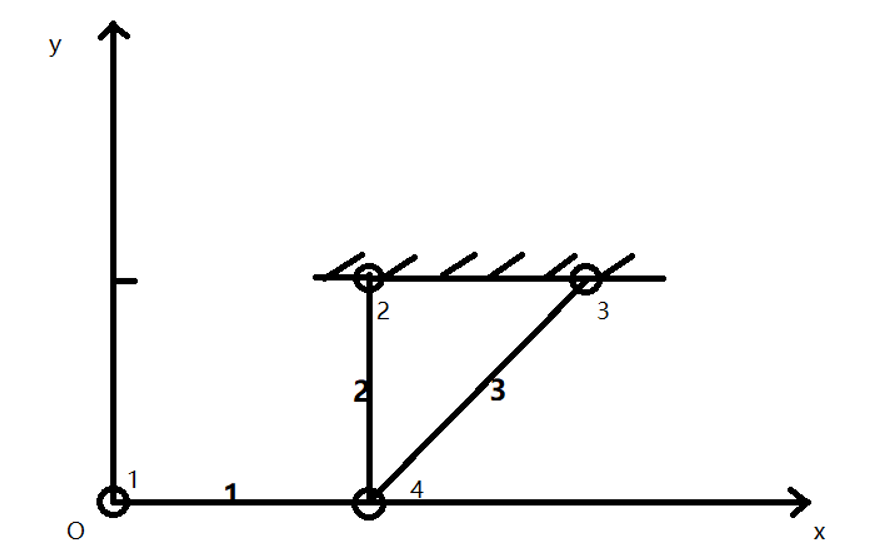

In [6]:
#输入节点编号和节点坐标
Nnolist = [[0] * M for i in range(dim)]  #节点编号列表
Ncoorlist = [[0] * dim for i in range(N)]  #节点坐标列表
for i in range(dim):
    for j in range(M):
        Nnolist[i][j] = int(float(input("节点编号：")))
for i in range(N):
    for j in range(dim):
        Ncoorlist[i][j] = int(float(input("节点坐标：")))

节点编号：1
节点编号：2
节点编号：3
节点编号：4
节点编号：4
节点编号：4
节点坐标：0
节点坐标：0
节点坐标：1
节点坐标：1
节点坐标：2
节点坐标：1
节点坐标：1
节点坐标：0


&emsp;&emsp;对于约束和载荷来说，建立约束矩阵列表和载荷矩阵列表（$n*dim$，$dim$为桁架的维数，$n$为节点数）。节点的哪个方向存在约束，则在约束矩阵的相应位置置“1”，节点的哪个方向存在载荷，则在载荷矩阵的相应位置置以具体载荷大小。<br>
&emsp;&emsp;在输入节点约束和节点载荷时，首先输入节点编号，再输入约束（载荷）方向，0为$x$方向，1为$y$方向，以此类推，当全部输入完成后，按Enter键结束输入.

In [9]:
#输入节点约束和节点载荷
Conlist = [[0] * N for i in range(dim)]  #节点约束列表
while 1:
    y = input("节点约束编号（输入空结束）：")
    if y == "":
        print("{:#^30}".format("约束输入完成"))
        break
    else:
        y = int(y)
        x = int(float(input("约束方向：")))
        Conlist[x][y] = 1
Loadlist = [[0] * N for i in range(dim)]  #节点载荷列表
while 1:
    y = input("节点载荷编号（输入空结束）：")
    if y == "":
        print("{:#^30}".format("载荷输入完成"))
        break
    else:
        y = int(y)
        x = int(float(input("载荷方向：")))
        load = input("载荷：")
        Loadlist[x][y] = int(float(load))

节点约束编号（输入空结束）：0
约束方向：0
节点约束编号（输入空结束）：1
约束方向：0
节点约束编号（输入空结束）：2
约束方向：0
节点约束编号（输入空结束）：0
约束方向：1
节点约束编号（输入空结束）：1
约束方向：1
节点约束编号（输入空结束）：2
约束方向：1
节点约束编号（输入空结束）：
############约束输入完成############
节点载荷编号（输入空结束）：3
载荷方向：1
载荷：-100
节点载荷编号（输入空结束）：
############载荷输入完成############


In [10]:
#根据输入参数求各杆长度
M_length = [0 for i in range(M)]
for i in range(M):
    x = np.array(Ncoorlist[Nnolist[0][i]-1])
    y = np.array(Ncoorlist[Nnolist[1][i]-1])
    M_length[i] = np.linalg.norm(x-y)

In [11]:
N_global = [[0] * dim*2 for i in range(M)]  #节点全局编号信息
K = [[0] * N * dim for i in range(N*dim)]  #建立总刚度矩阵

&emsp;&emsp;对于每根杆而言，首先根据其物性参数计算其在局部坐标系下的单元刚度矩阵，再根据上述的坐标转换矩阵函数，将得到的每根杆的局部单元刚度矩阵转换得到每根杆对应的全局单元刚度矩阵，根据输入的各节点编号列表计算节点的全局编号，再根据生成的全局编号将每根杆对应的全局单元刚度矩阵合成总刚度矩阵$K$。

In [12]:
for i in range(M):
    LK = E*A/M_length[i]*np.array([[1,-1],[-1,1]])  #局部坐标系下的单元刚度矩阵
    TK = Transf(Nnolist,Ncoorlist,M_length,i)  #坐标转换矩阵函数
    GK = np.dot(np.dot(TK.T,LK),TK)  #全局坐标系下的单元刚度矩阵
    for j in range(dim*2):  #计算节点全局编号
        if j <= dim - 1:
            N_global[i][j] = (Nnolist[0][i] - 1) * dim + j
        else:
            N_global[i][j] = (Nnolist[1][i] - 1) * dim + j - dim
    for m in range(dim*2):  #总刚度矩阵合成
        for n in range(dim*2):
            K[N_global[i][m]][N_global[i][n]] = K[N_global[i][m]][N_global[i][n]] + GK[m][n]

In [13]:
#主对角元素置大数法进行约束处理
for j in range(N):
    for i in range(dim):
        if Conlist[i][j] == 1:
            k = j * dim + i
            K[k][k] = 10**100

&emsp;&emsp;在采用主对角元素置大数法后，将总刚度矩阵$K$转换为DataFrame格式以便查看，下面的节点位移$u$与此相同。

In [14]:
K_df = pd.DataFrame(K)

In [15]:
K_df

,0,1,2,3,4,5,6,7
0,1000000000000000000000000000000000000000000000...,0.0,0,0,0,0,-7.300000e+06,0.000000e+00
1,0.0,1000000000000000000000000000000000000000000000...,0,0,0,0,0.000000e+00,0.000000e+00
2,0,0,1000000000000000000000000000000000000000000000...,0.0,0,0,0.000000e+00,0.000000e+00
3,0,0,0.0,1000000000000000000000000000000000000000000000...,0,0,0.000000e+00,-7.300000e+06
4,0,0,0,0,1000000000000000000000000000000000000000000000...,2580939.751331,-2.580940e+06,-2.580940e+06
5,0,0,0,0,2580939.751331,1000000000000000000000000000000000000000000000...,-2.580940e+06,-2.580940e+06
6,-7300000.0,0.0,0.0,0.0,-2580939.751331,-2580939.751331,9.880940e+06,2.580940e+06
7,0.0,0.0,0.0,-7300000.0,-2580939.751331,-2580939.751331,2.580940e+06,9.880940e+06


In [16]:
#利用上述Cholesky分解法计算节点位移
u = Solute(K,Loadlist,dim)

In [17]:
u_df = pd.DataFrame(u)

In [18]:
u_df

,0
0,0.000000e+00
1,0.000000e+00
2,0.000000e+00
3,-7.928932e-99
4,-2.071068e-99
5,-2.071068e-99
6,2.837079e-06
7,-1.086155e-05


&emsp;&emsp;该模型的材料属性如下表所示：

弹性模量|泊松比|密度|横截面面积
-----|-----|-----|-----
73|0.33|2700|0.0001

&emsp;&emsp;根据该程序计算得到的u和实际u相比较可以得到如下结果对比图：

节点编号|1|2|3|4
---|-----|-----|---|---
x方向节点位移计算值|0|0|0|0.002837mm
y方向节点位移计算值|0|0|0|-0.010862mm
x方向节点位移理论值|0|0|0|0.00284mm
y方向节点位移理论值|0|0|0|-0.01086mm

## 总结

&emsp;&emsp;本文利用jupyter平台，基于有限单元法基本原理，编写了适用于二维、三维任意结构的静力学计算模型，最终得到的结果为单元节点位移，经过一实际模型测算，通过对比程序计算值和实际理论值，验证了程序计算有效。